<a href="https://colab.research.google.com/github/vachkim/PROJECT/blob/master/%EC%9C%A0%ED%86%B5%ED%8C%80/Pro_%EC%B5%9C%EC%A2%85_%EB%84%A4%EC%9D%B4%EB%B2%84%20%EB%B8%94%EB%A1%9C%EA%B7%B8%20%EA%B2%8C%EC%8B%9C%EA%B8%80%20%EC%88%98%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 출시일전 2년과 출시후 6개월 바탕으로 크롤링한거 시각화입니다
- 크롤링 한 키워드는 csv파일명과 동일합니다

- 갈릭버터 같은 경우에는 갈릭버터와 버터갈릭
- 매운 같은 경우에는 매운, 얼큰
- 건강은 건강과 건면 두 키워드를 포함해 크롤링(비건은 채황라면 떄문에 별도의 파일로 저장)

##### CSV로 저장할 때, 두 개 키워드는 별도의 칼럼에 저장했습니다 BUT 그래프를 그릴 때에는 SUM으로 빈도수를 합쳐서 이용했다는 사실

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import time
from datetime import datetime, timedelta

In [ ]:
#일자별로 뽑힌 빈도수 데이터를 월별로 추합하는 함수
def handle(x):
    new_x = x.copy()
    
    date_list = new_x['date']
    new_list = []
    for item in date_list:
        itemstr = str(item)
        new_list.append(itemstr[0:6])
    new_x['date'] = new_list
    
    graph_x = new_x.groupby(['date']).sum()
    final_x = graph_x.reset_index()
    return final_x

In [ ]:
#일자별로 뽑힌 빈도수 데이터를 월별로 추합하고 그래프까지 그리는 함수
#월별로 정리된 CSV넣으면 에러가 뜨거나, 그래프가 이상해집니당
#일자별 데이터인지 꼭확인해주세요
#만약 월별 데이터일 경우 데이터프레임 이름을 final_x로 바꿔주고 if문부터 실행시키면 됩니당

def draw_graph(x):
    new_x = x.copy() #복사본을 만들어서 코드를 실행시키기 때문에 원본자료는 변하지 않습네다
    del new_x['Unnamed: 0']
    
    date_list = new_x['date']
    new_list = []
    
    for item in date_list:
        itemstr = str(item)
        new_list.append(itemstr[0:6])

    new_x['date'] = new_list
    
    graph_x = new_x.groupby(['date']).sum()
    final_x = graph_x.reset_index()

# 하나의 csv안에 두 개의 키워드(EX.매운,얼큰의 경우)를 입력한경우 len==3항목으로
    if len(final_x.columns) == 3:
        final_x.columns = ['date','frequency1','frequency2']
        final_x['sum'] = final_x['frequency1'] + final_x['frequency2']
        plt.figure(figsize=(30,15))
        sns.set(style="whitegrid")
        sns.lineplot(x='date', y='sum',data=final_x);
        sns.barplot(x='date', y='sum',palette='ch:.25',data=final_x);
        plt.axvline(final_x.iloc[24,0], lw=6, color='g')

# 그렇지 않은 경우에는 else의 항목으로 그래프를 그렸심더
    else:
        final_x.columns = ['date','frequency']
        plt.figure(figsize=(30,15))
        sns.set(style="whitegrid")
        sns.lineplot(x='date', y='frequency',data=final_x);
        sns.barplot(x='date', y='frequency',palette='ch:.25',data=final_x);
        plt.axvline(final_x.iloc[24,0], lw=6, color='g')

In [ ]:
# 변화율 뽑는 함수 정의
def percentage_change(current, previous):
    if previous != 0 :
        return (float(current - previous) / abs(previous)) #여기다가 곱히기 100해주면 %가 나오고 아니면 0.nn비율로 나옵니당
    else:
        return "undefined"

In [ ]:
# 변화율 그래프 그리는 함수 정의 
# 위와 마찬가지로 일자별 빈도수 데이터를 받습니다
def diff_graph(x):
    new_x = x.copy()
    del new_x['Unnamed: 0']
    
    date_list = new_x['date']
    new_list = []
    for item in date_list:
        itemstr = str(item)
        new_list.append(itemstr[0:6])
    new_x['date'] = new_list
    
    graph_x = new_x.groupby(['date']).sum()
    final_x = graph_x.reset_index()

    if len(final_x.columns) == 3:
        final_x.columns = ['date','frequency1','frequency2']
        final_x['sum'] = final_x['frequency1'] + final_x['frequency2']
        ratio_list = [0]
        for num in range(0,len(final_x)-1):
            ratio_list.append(percentage_change(final_x.iloc[num+1,3],final_x.iloc[num,3]))
            
    else:
        final_x.columns = ['date','frequency']
        ratio_list = [0]
        for num in range(0,len(final_x)-1):
            ratio_list.append(percentage_change(final_x.iloc[num+1,1],final_x.iloc[num,1]))
    
    final_x['diff'] = ratio_list
    plt.figure(figsize=(30,15))
    sns.set(style="whitegrid")
    sns.lineplot(x='date', y='diff',data=final_x);
    sns.barplot(x='date', y='diff',palette='ch:.25',data=final_x);
    plt.axvline(final_x.iloc[24,0], lw=6, color='g')

In [ ]:
garlic = pd.read_csv('갈릭버터.csv') 
mara = pd.read_csv('마라.csv')
boodae = pd.read_csv('부대찌개.csv')
wasamayo = pd.read_csv('와사비마요.csv')
jjapa = pd.read_csv('짜파구리.csv')
cream = pd.read_csv('크림.csv')
health = pd.read_csv('건강건면.csv')
spicy = pd.read_csv('매운얼큰.csv')
spicy = handle(spicy)
spicy = spicy.drop(29)

##### 아래 그래프에서 초록색 선은 제품 출시일입니다
- 갈릭버터 = 갈릭버터볶음면
- 마라 = 마라탕면
- 부대찌개 = 부대찌개라면
- 와사비마요 = 와사마요볶음면
- 짜파구리 = 짜파구리
- 크림 = 크림까르보불닭
    + 출시일자가 2020년 9월이라 이후 데이터 없음
- 건강건면 = 신라면건면
- 매운얼큰 = 앵그리너구리(핵불닭은 2020년 이전 데이터라 최근 매운맛을 많이 찾는다는 트렌드를 보여줄 수 없을 것 같아 RTA했습니다)
    + 출시일자가 2020년 5월이라 출시 후 6개월째에 해당하는 2020년 10월 데이터 부재

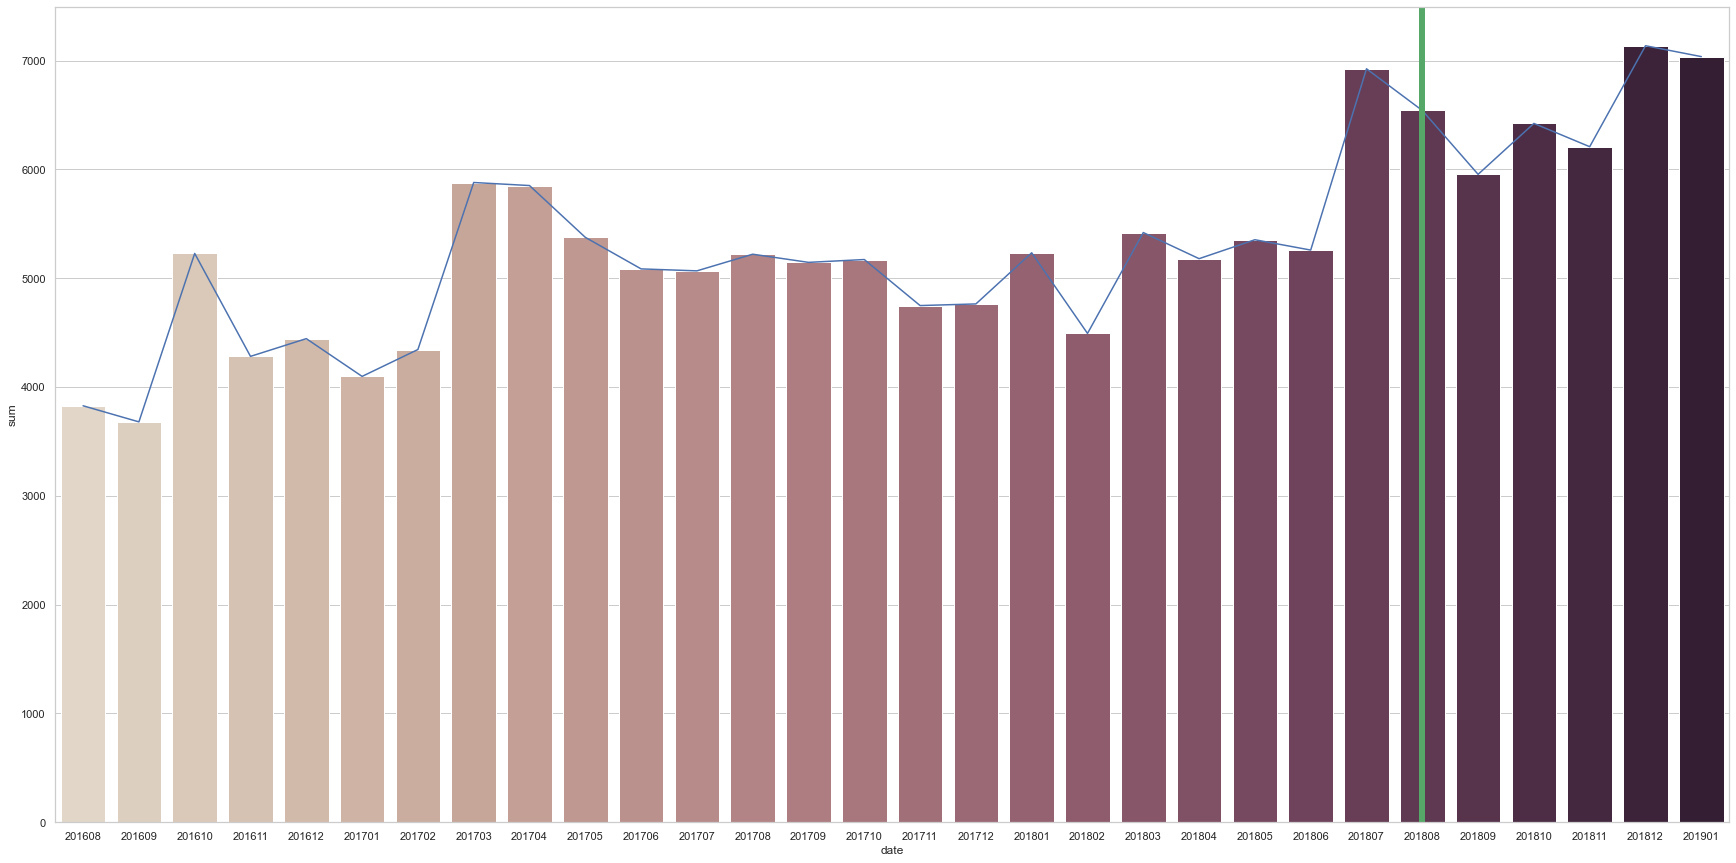

In [ ]:
draw_graph(garlic)

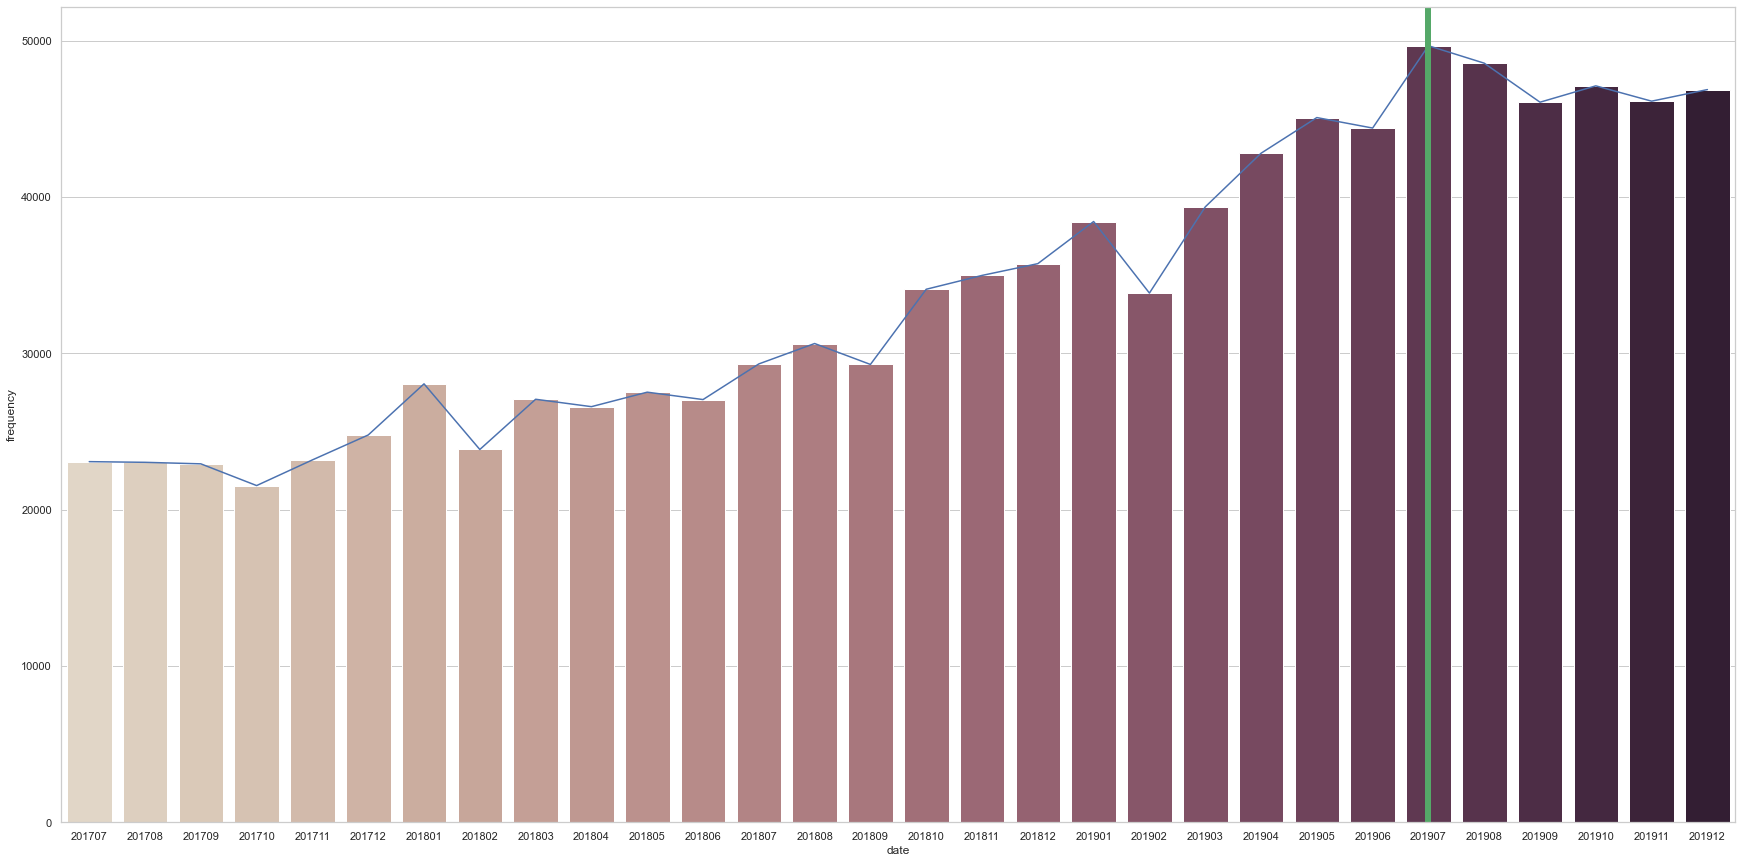

In [ ]:
draw_graph(mara)

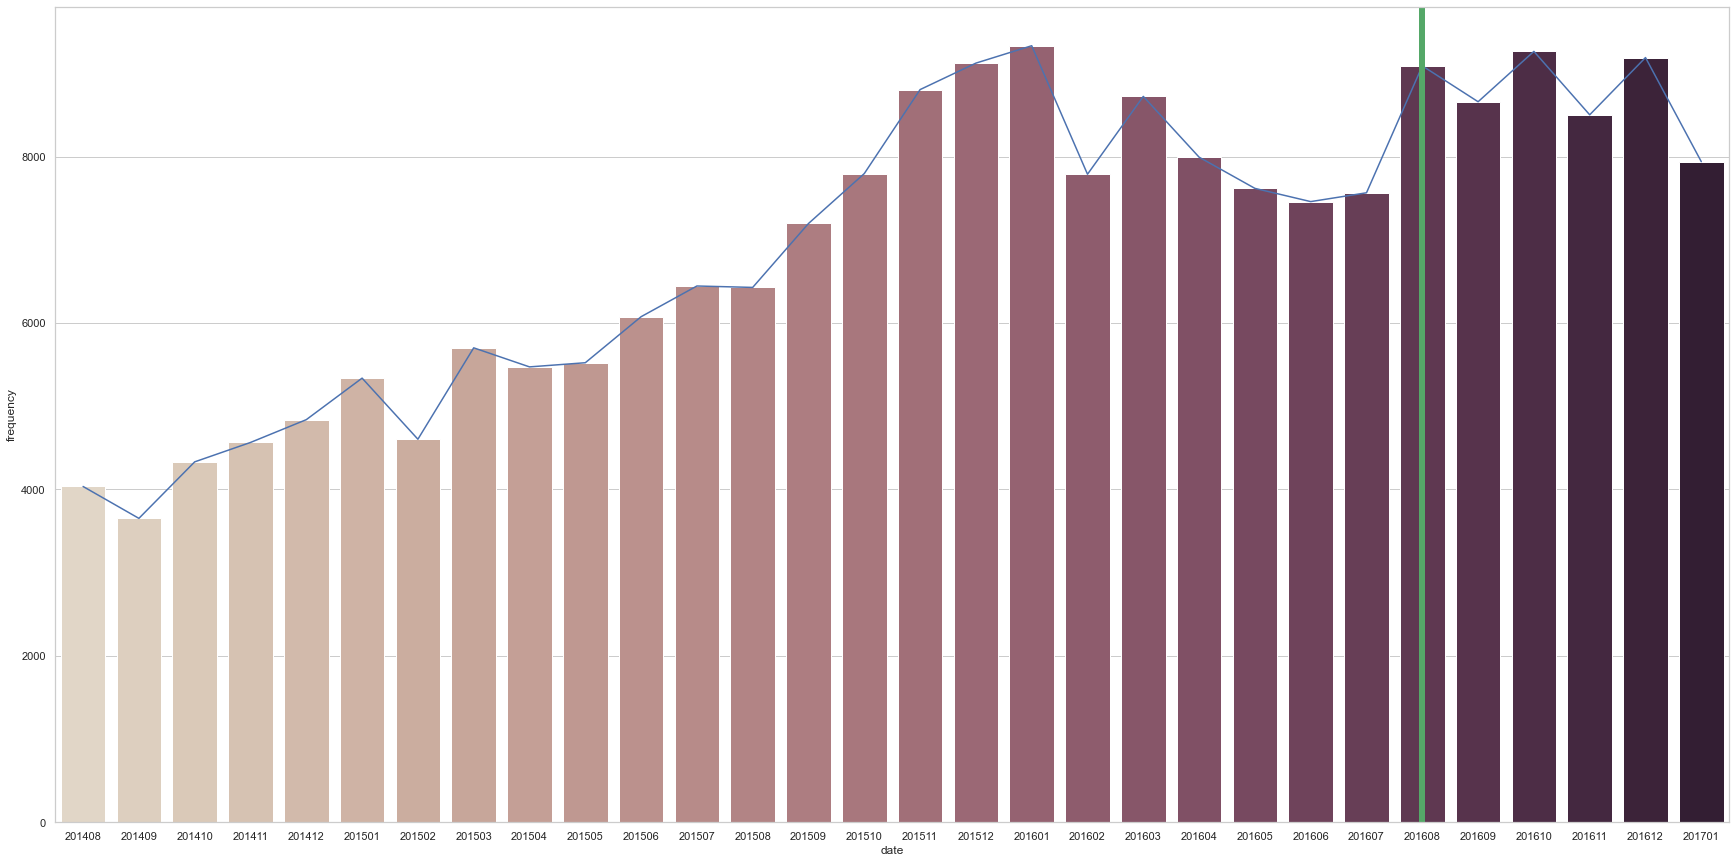

In [ ]:
draw_graph(boodae)

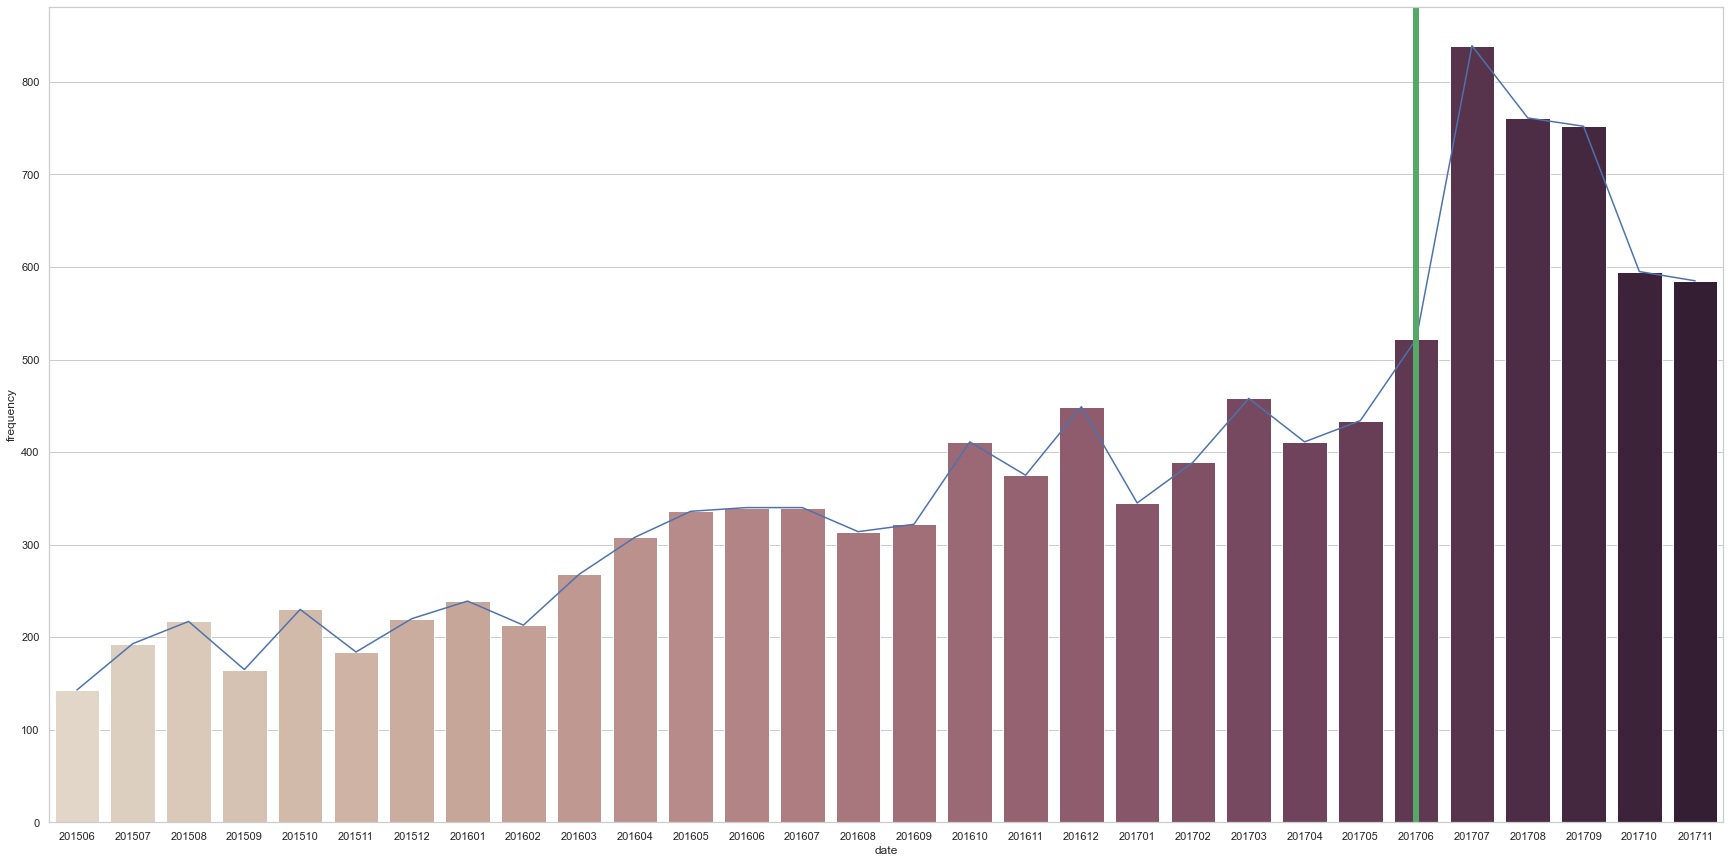

In [ ]:
draw_graph(wasamayo)

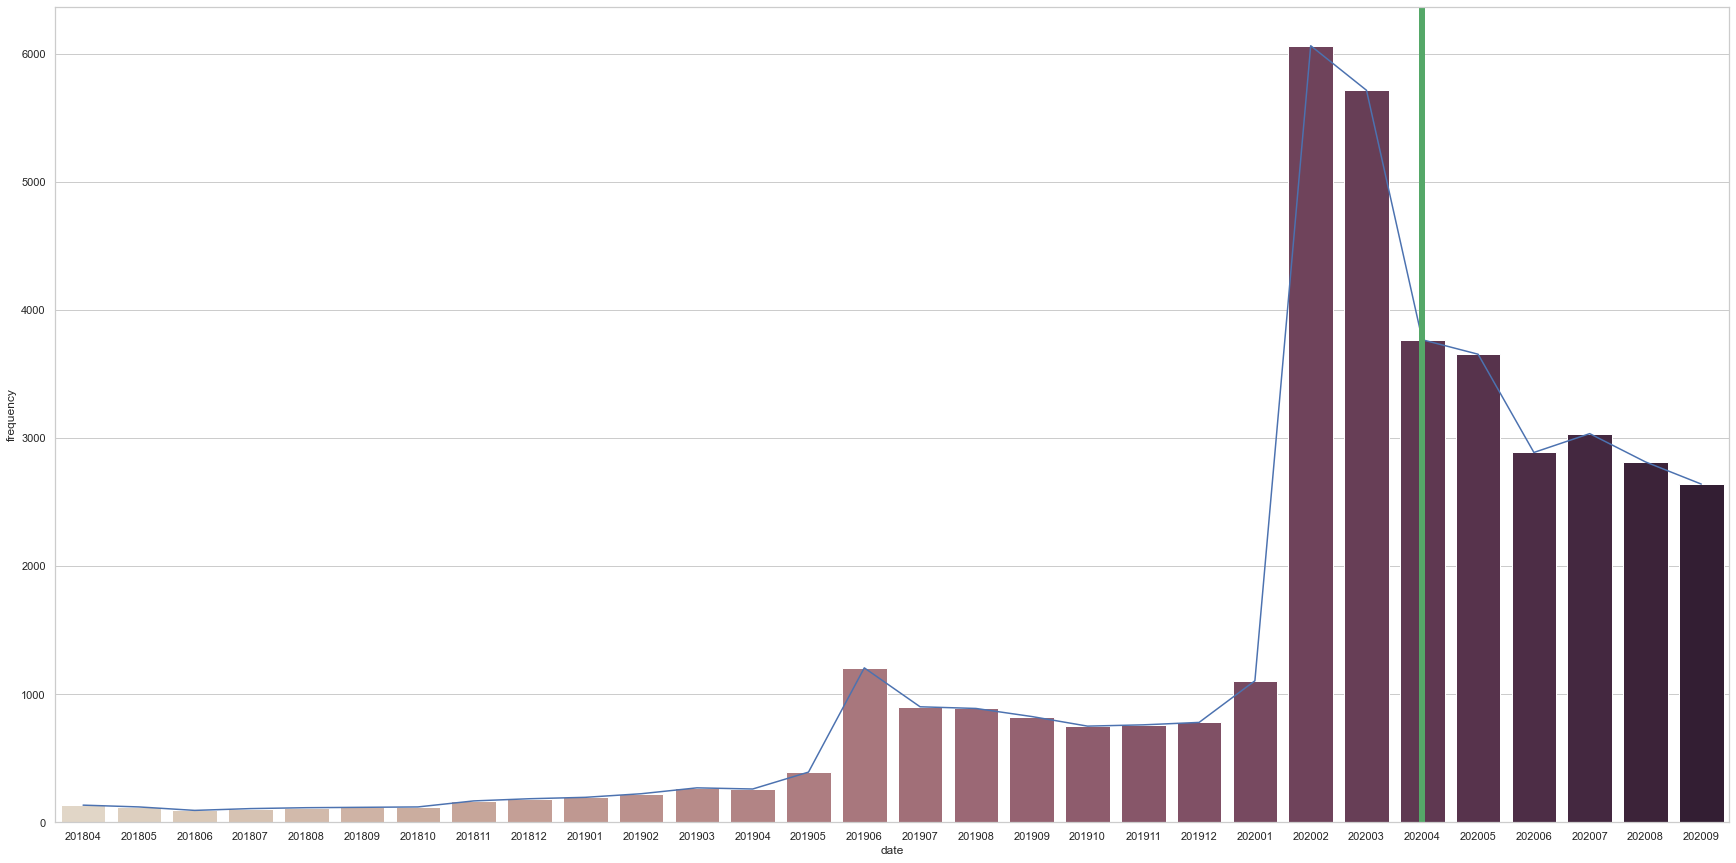

In [ ]:
draw_graph(jjapa)

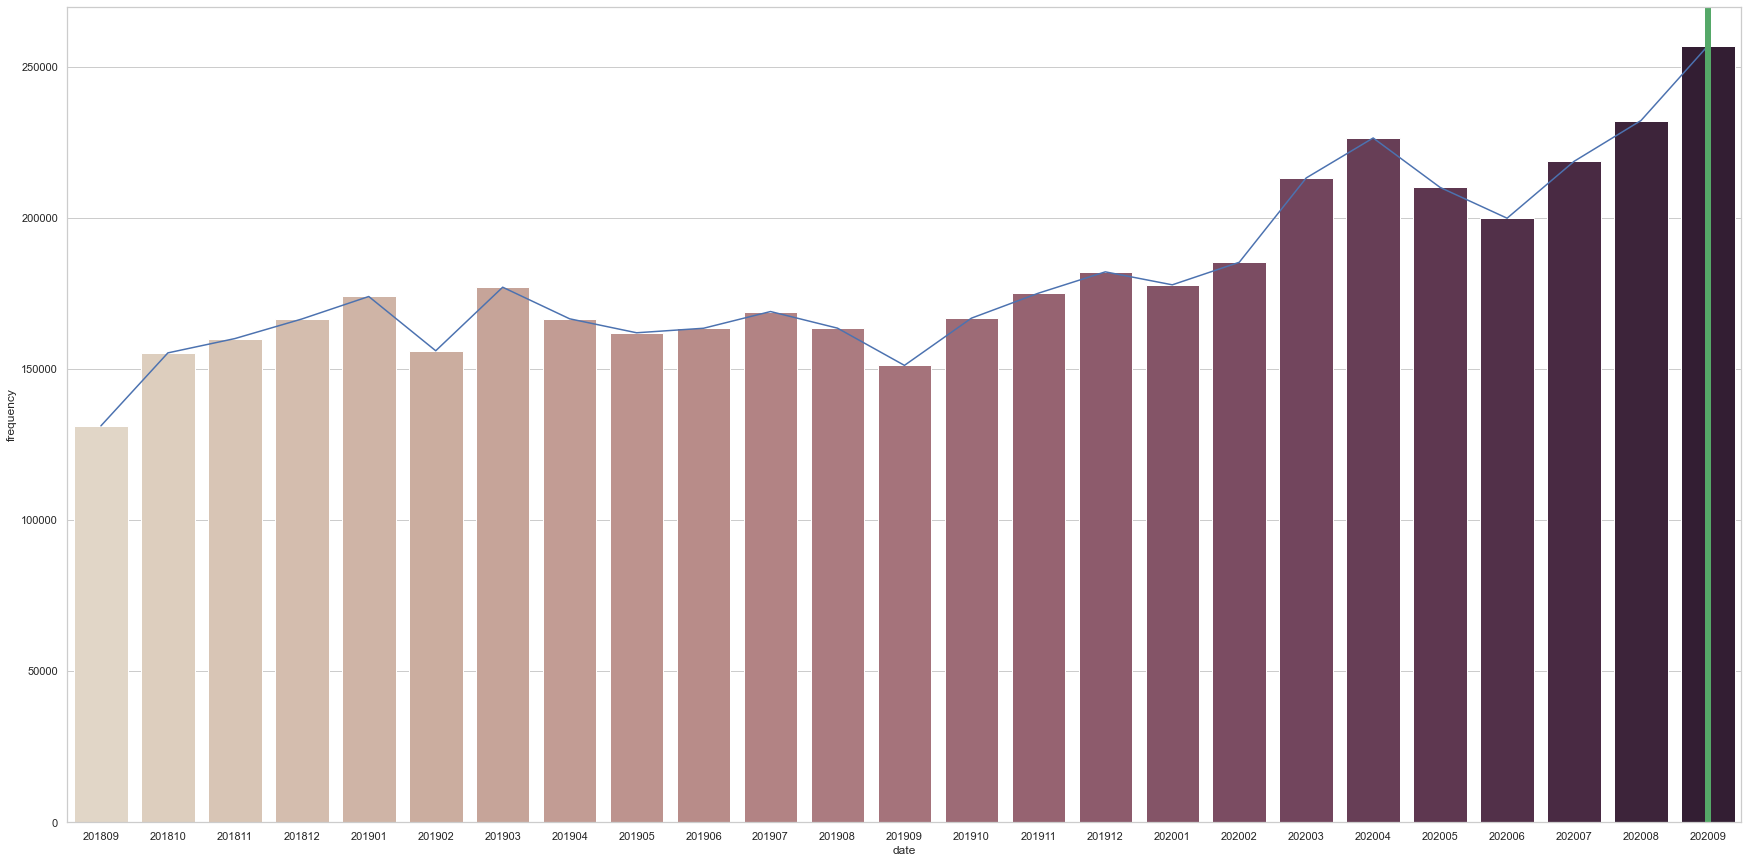

In [ ]:
draw_graph(cream)

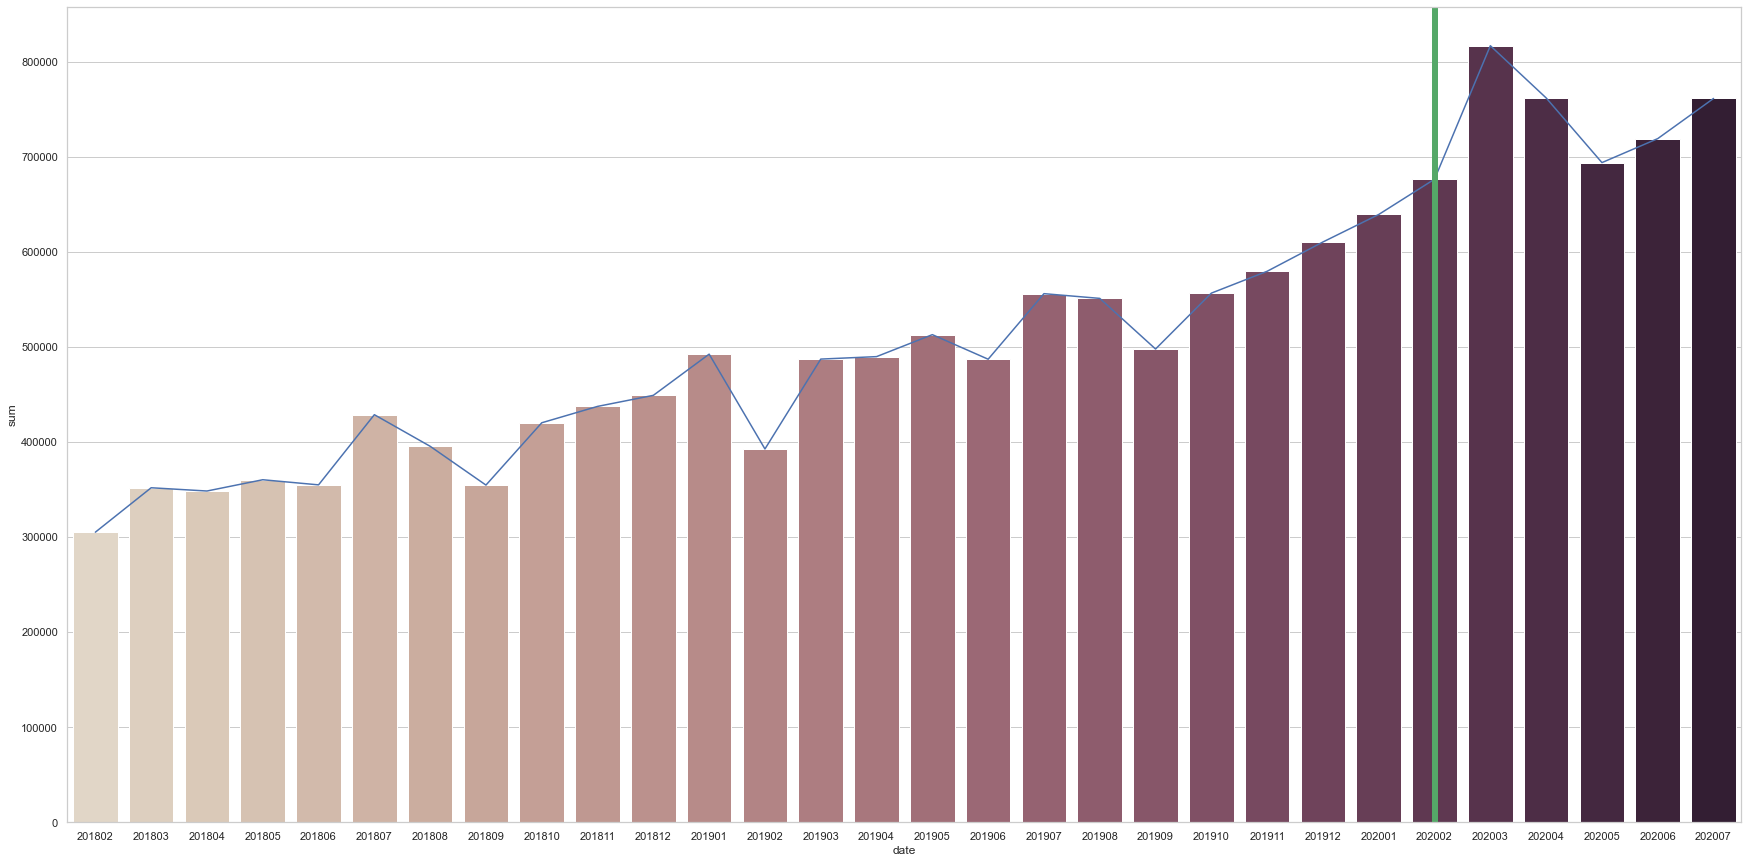

In [ ]:
draw_graph(health)

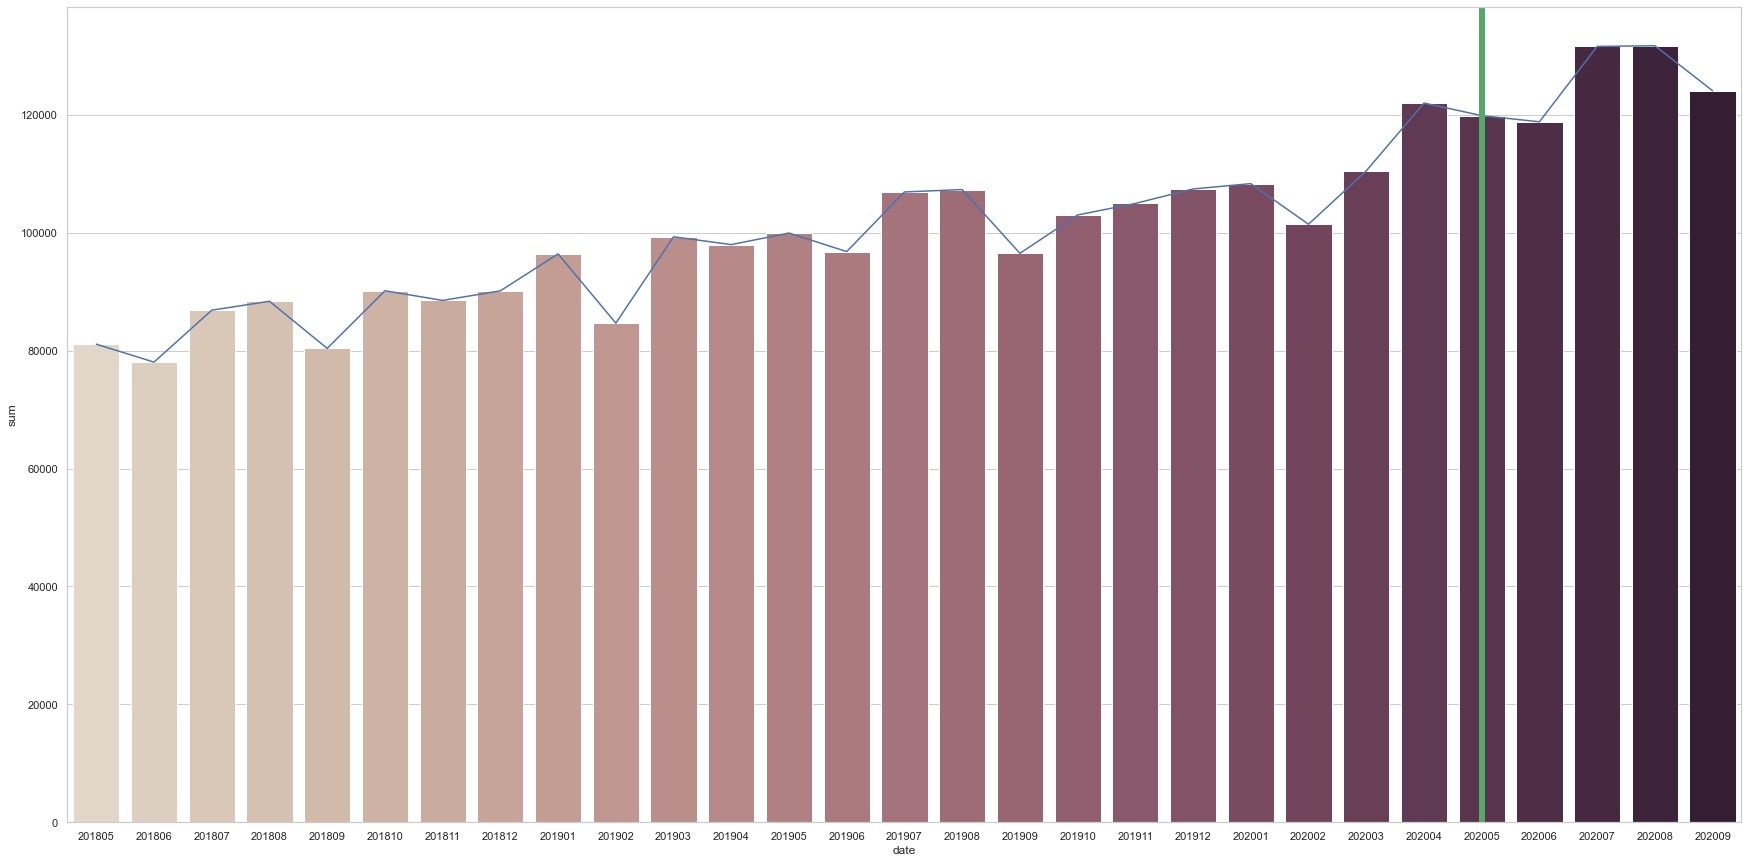

In [ ]:
draw_graph(spicy)